# Code for the analysis of data file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Reading CSV file excluding 2015 data, converting to DateTime format, and extracting date, month, time and hours

In [2]:
 data = pd.read_csv("THERM_ROOMS.csv",parse_dates=[['Date', 'Time']])
# data = pd.read_csv("Desktop/Europa_EAU/EAU_Rooms2.csv")
for i in range(1,73):
    data = data.ix[(data['R'+str(i)] >= 0)]
    
data['Total']= data['R1']
for i in range(2,73):
    data['Total']= data['Total']+data['R'+str(i)]
    
# data['Date_Time']= pd.to_datetime(data['Date_Time']) 
# data['date'] = pd.DatetimeIndex(data['Date_Time']).date
# data['month'] = pd.DatetimeIndex(data['Date_Time']).month



C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [3]:
data['Date_Time']= pd.to_datetime(data['Date_Time']) 
data['date'] = pd.DatetimeIndex(data['Date_Time']).date
data['month'] = pd.DatetimeIndex(data['Date_Time']).month



In [4]:
data['year'] = pd.DatetimeIndex(data['Date_Time']).year


In [5]:
data['hour'] = pd.DatetimeIndex(data['Date_Time']).hour

In [6]:
data

,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R68,R69,R70,R71,R72,Total,date,month,year,hour
0,2016-01-01 00:58:28,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,0.34,...,1.12,893.13,0.61,1488.50,0.0,186757.66,2016-01-01,1,2016,0
1,2016-01-01 00:55:28,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,0.34,...,1.12,893.13,0.61,1488.50,0.0,186754.40,2016-01-01,1,2016,0
2,2016-01-01 00:52:28,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,0.34,...,1.12,893.13,0.61,1488.50,0.0,186750.11,2016-01-01,1,2016,0
3,2016-01-01 00:49:28,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,0.34,...,1.12,893.13,0.61,1488.50,0.0,186746.76,2016-01-01,1,2016,0
4,2016-01-01 00:46:28,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,0.34,...,1.12,893.13,0.61,1488.50,0.0,186742.38,2016-01-01,1,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650839,2019-09-20 12:12:48,1851.02,5610.85,75.87,87285.44,4.69,6404.24,87.16,98747.32,0.00,...,29.81,11228.89,31.16,8119.07,0.0,5790344.99,2019-09-20,9,2019,12
650840,2019-09-20 12:09:48,1851.02,5610.85,75.87,87285.37,4.69,6404.22,87.16,98747.23,0.00,...,29.81,11228.89,31.16,8119.07,0.0,5790343.49,2019-09-20,9,2019,12
650841,2019-09-20 12:06:48,1851.02,5610.85,75.87,87285.26,4.69,6404.19,87.16,98747.08,0.00,...,29.81,11228.78,31.16,8119.07,0.0,5790324.61,2019-09-20,9,2019,12
650842,2019-09-20 12:03:48,1851.02,5610.85,75.87,87285.15,4.69,6404.16,87.16,98746.91,0.00,...,29.81,11228.78,31.16,8119.07,0.0,5790323.69,2019-09-20,9,2019,12


In [7]:
data=data.sort_values(by=['Date_Time'])

In [8]:
data = data.reset_index()
data

,index,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,...,R68,R69,R70,R71,R72,Total,date,month,year,hour
0,19,2016-01-01 00:01:27,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,1.12,893.13,0.61,1488.50,0.0,186682.79,2016-01-01,1,2016,0
1,18,2016-01-01 00:04:27,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,1.12,893.13,0.61,1488.50,0.0,186687.16,2016-01-01,1,2016,0
2,17,2016-01-01 00:07:27,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,1.12,893.13,0.61,1488.50,0.0,186690.39,2016-01-01,1,2016,0
3,16,2016-01-01 00:10:27,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,1.12,893.13,0.61,1488.50,0.0,186695.77,2016-01-01,1,2016,0
4,15,2016-01-01 00:13:27,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,1.12,893.13,0.61,1488.50,0.0,186699.03,2016-01-01,1,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650322,647215,2019-12-09 23:47:47,1851.02,5610.85,75.44,86953.14,4.59,6322.17,86.71,98287.28,...,29.75,11041.40,30.95,8103.69,0.0,5759852.72,2019-12-09,12,2019,23
650323,647214,2019-12-09 23:50:47,1851.02,5610.85,75.44,86953.20,4.59,6322.19,86.71,98287.38,...,29.75,11041.40,30.95,8103.79,0.0,5759867.34,2019-12-09,12,2019,23
650324,647213,2019-12-09 23:53:47,1851.02,5610.85,75.44,86953.30,4.59,6322.23,86.71,98287.51,...,29.75,11041.52,30.95,8103.79,0.0,5759868.84,2019-12-09,12,2019,23
650325,647212,2019-12-09 23:56:47,1851.02,5610.85,75.44,86953.39,4.59,6322.24,86.71,98287.64,...,29.75,11041.52,30.95,8103.79,0.0,5759885.57,2019-12-09,12,2019,23


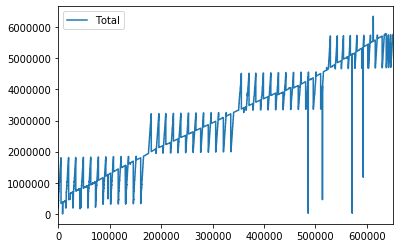

In [9]:
data.plot(y='Total')

In [10]:
data['Index'] = data.index/1000
x = data['Index']
data

,index,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,...,R69,R70,R71,R72,Total,date,month,year,hour,Index
0,19,2016-01-01 00:01:27,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,893.13,0.61,1488.50,0.0,186682.79,2016-01-01,1,2016,0,0.000
1,18,2016-01-01 00:04:27,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,893.13,0.61,1488.50,0.0,186687.16,2016-01-01,1,2016,0,0.001
2,17,2016-01-01 00:07:27,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,893.13,0.61,1488.50,0.0,186690.39,2016-01-01,1,2016,0,0.002
3,16,2016-01-01 00:10:27,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,893.13,0.61,1488.50,0.0,186695.77,2016-01-01,1,2016,0,0.003
4,15,2016-01-01 00:13:27,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,893.13,0.61,1488.50,0.0,186699.03,2016-01-01,1,2016,0,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650322,647215,2019-12-09 23:47:47,1851.02,5610.85,75.44,86953.14,4.59,6322.17,86.71,98287.28,...,11041.40,30.95,8103.69,0.0,5759852.72,2019-12-09,12,2019,23,650.322
650323,647214,2019-12-09 23:50:47,1851.02,5610.85,75.44,86953.20,4.59,6322.19,86.71,98287.38,...,11041.40,30.95,8103.79,0.0,5759867.34,2019-12-09,12,2019,23,650.323
650324,647213,2019-12-09 23:53:47,1851.02,5610.85,75.44,86953.30,4.59,6322.23,86.71,98287.51,...,11041.52,30.95,8103.79,0.0,5759868.84,2019-12-09,12,2019,23,650.324
650325,647212,2019-12-09 23:56:47,1851.02,5610.85,75.44,86953.39,4.59,6322.24,86.71,98287.64,...,11041.52,30.95,8103.79,0.0,5759885.57,2019-12-09,12,2019,23,650.325


In [38]:
import seaborn as sns
# df.plot(y='Total',style='.-')
sns.set(rc={'figure.figsize':(17,6)})
df.plot(y='Total')

NameError: name 'df' is not defined

In [44]:
t6=data.loc[15000:75000]
t6

,index,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,...,R69,R70,R71,R72,Total,date,month,year,hour,Index
15000,680,2016-02-01 10:59:24,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,893.13,0.61,1488.50,0.0,189834.51,2016-02-01,2,2016,10,15.000
15001,719,2016-02-01 11:02:24,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,893.13,0.61,1488.50,0.0,189839.82,2016-02-01,2,2016,11,15.001
15002,718,2016-02-01 11:05:24,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,893.13,0.61,1488.50,0.0,189843.13,2016-02-01,2,2016,11,15.002
15003,717,2016-02-01 11:08:24,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,893.13,0.61,1488.50,0.0,189846.54,2016-02-01,2,2016,11,15.003
15004,716,2016-02-01 11:11:24,0.00,4308.53,0.00,0.00,0.04,0.00,0.00,0.00,...,893.13,0.61,1488.50,0.0,189849.86,2016-02-01,2,2016,11,15.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74996,60745,2016-06-05 19:31:54,1798.17,4613.62,0.11,21677.94,0.44,3638.72,0.03,12741.55,...,5205.34,0.61,1488.74,0.0,921448.80,2016-06-05,6,2016,19,74.996
74997,60744,2016-06-05 19:34:54,1798.17,4613.62,0.11,21678.04,0.44,3638.73,0.03,12741.64,...,5205.45,0.61,1488.74,0.0,916860.44,2016-06-05,6,2016,19,74.997
74998,60743,2016-06-05 19:37:54,1798.17,4613.62,0.11,21678.16,0.44,3638.74,0.03,12741.72,...,5205.56,0.61,1488.74,0.0,921453.06,2016-06-05,6,2016,19,74.998
74999,60742,2016-06-05 19:40:54,1798.17,4613.62,0.11,21678.27,0.44,3638.76,0.03,12741.77,...,5205.56,0.61,1488.74,0.0,916877.42,2016-06-05,6,2016,19,74.999


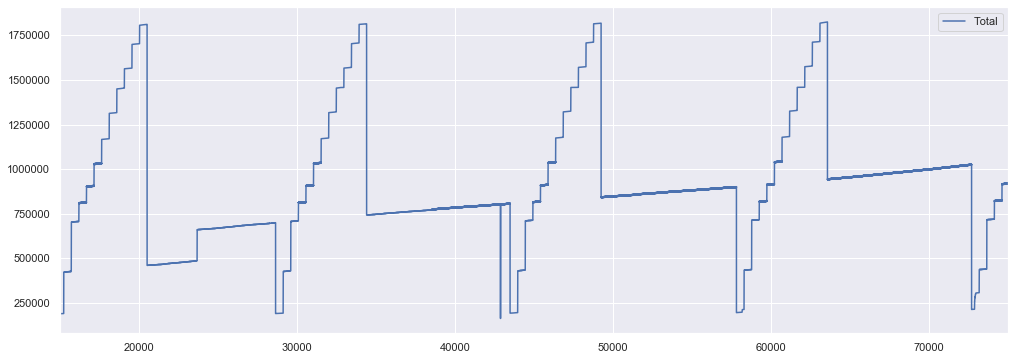

In [45]:
t6.plot(y='Total')

In [46]:
from sklearn import datasets
import statsmodels.api as sm

y1 = data['Total']
model  = sm.OLS(y1,x).fit()
pred = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Total   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.963e+07
Date:                Tue, 17 Dec 2019   Prob (F-statistic):                        0.00
Time:                        16:20:50   Log-Likelihood:                     -9.3704e+06
No. Observations:              650327   AIC:                                  1.874e+07
Df Residuals:                  650326   BIC:                                  1.874e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Index       9105.3726      1.446   6295.245      0.000    9102.538    9108.208
==============================================================================
Omnibus:                    41167.241   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           196292.421
Skew:                          -0.013   Prob(JB):                         0.00
Kurtosis:                       5.691   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

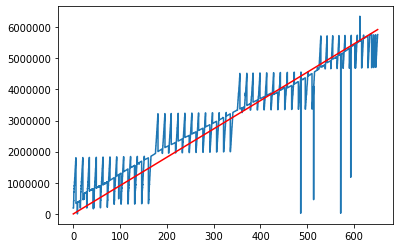

In [12]:
plt.plot(x,y1)
plt.plot(x,pred,color='red')
plt.show()

In [13]:
# data['Date'] = pd.DatetimeIndex(data['Date'])

# data2: data grouped by month of the year

In [14]:
data2= data.groupby(['year','month']).sum()

In [15]:
data6= data.groupby(['date']).sum()

In [16]:
data6 = data6.reset_index()


In [17]:
data6

,date,index,R1,R2,R3,R4,R5,R6,R7,R8,...,R68,R69,R70,R71,R72,Total,month,year,hour,Index
0,2016-01-01,114960,0.00,2068094.40,0.00,0.00,19.20,0.00,0.00,0.00,...,537.60,428702.40,292.80,714480.00,0.0,9.012897e+07,480,967680,5520,114.960
1,2016-01-02,7226640,862377.60,2209742.40,24.00,7174541.22,88.50,1710349.25,4.80,3252054.21,...,1212.68,777875.21,292.80,714480.00,0.0,2.017141e+08,480,967680,5520,345.360
2,2016-01-03,13905840,863112.00,2214537.60,48.00,8586113.69,139.20,1717694.40,14.40,4371650.47,...,2762.80,1257426.95,292.80,714480.00,0.0,3.368891e+08,480,967680,5520,575.760
3,2016-01-04,21025200,863121.60,2214537.60,48.00,9529237.71,144.00,1718841.60,14.40,5312235.35,...,4871.65,1838916.16,292.80,714595.20,0.0,3.880343e+08,480,967680,5520,806.160
4,2016-01-05,27934320,863121.60,2214537.60,52.80,10274583.97,187.20,1738833.24,14.40,5990882.56,...,6727.30,2399324.63,292.80,714595.20,0.0,4.326060e+08,480,967680,5520,1036.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2019-12-05,281706606,886480.51,2687573.20,33601.26,38997232.78,1480.11,2427164.85,38426.39,43352094.29,...,14250.25,5285372.22,11419.36,3228387.05,0.0,2.501053e+09,5748,967101,5518,310473.430
1355,2019-12-06,288824067,886638.58,2687573.20,33945.88,39679855.70,1597.04,2522398.24,38880.43,44311744.69,...,14250.25,5285386.59,11840.03,3328680.02,0.0,2.572314e+09,5748,967101,5518,310702.871
1356,2019-12-07,295675204,886638.58,2687597.15,34621.66,40351606.13,1810.04,2692958.15,39723.82,45258448.38,...,14250.25,5285400.96,12682.02,3480572.16,0.0,2.634726e+09,5748,967101,5505,310932.312
1357,2019-12-08,302792186,886638.58,2687597.15,35373.24,40990849.04,2019.04,2876237.51,40707.05,46171180.84,...,14250.25,5285405.75,13991.81,3722764.07,0.0,2.697718e+09,5748,967101,5518,311161.753


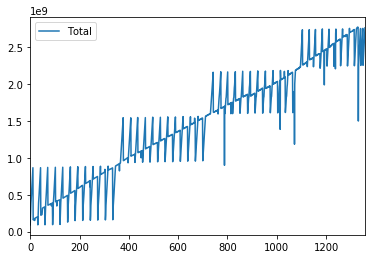

In [18]:
data6.plot(y='Total')

In [19]:
data6['Index'] = data6.index
x6 = data6['Index']



In [20]:
data6

,date,index,R1,R2,R3,R4,R5,R6,R7,R8,...,R68,R69,R70,R71,R72,Total,month,year,hour,Index
0,2016-01-01,114960,0.00,2068094.40,0.00,0.00,19.20,0.00,0.00,0.00,...,537.60,428702.40,292.80,714480.00,0.0,9.012897e+07,480,967680,5520,0
1,2016-01-02,7226640,862377.60,2209742.40,24.00,7174541.22,88.50,1710349.25,4.80,3252054.21,...,1212.68,777875.21,292.80,714480.00,0.0,2.017141e+08,480,967680,5520,1
2,2016-01-03,13905840,863112.00,2214537.60,48.00,8586113.69,139.20,1717694.40,14.40,4371650.47,...,2762.80,1257426.95,292.80,714480.00,0.0,3.368891e+08,480,967680,5520,2
3,2016-01-04,21025200,863121.60,2214537.60,48.00,9529237.71,144.00,1718841.60,14.40,5312235.35,...,4871.65,1838916.16,292.80,714595.20,0.0,3.880343e+08,480,967680,5520,3
4,2016-01-05,27934320,863121.60,2214537.60,52.80,10274583.97,187.20,1738833.24,14.40,5990882.56,...,6727.30,2399324.63,292.80,714595.20,0.0,4.326060e+08,480,967680,5520,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2019-12-05,281706606,886480.51,2687573.20,33601.26,38997232.78,1480.11,2427164.85,38426.39,43352094.29,...,14250.25,5285372.22,11419.36,3228387.05,0.0,2.501053e+09,5748,967101,5518,1354
1355,2019-12-06,288824067,886638.58,2687573.20,33945.88,39679855.70,1597.04,2522398.24,38880.43,44311744.69,...,14250.25,5285386.59,11840.03,3328680.02,0.0,2.572314e+09,5748,967101,5518,1355
1356,2019-12-07,295675204,886638.58,2687597.15,34621.66,40351606.13,1810.04,2692958.15,39723.82,45258448.38,...,14250.25,5285400.96,12682.02,3480572.16,0.0,2.634726e+09,5748,967101,5505,1356
1357,2019-12-08,302792186,886638.58,2687597.15,35373.24,40990849.04,2019.04,2876237.51,40707.05,46171180.84,...,14250.25,5285405.75,13991.81,3722764.07,0.0,2.697718e+09,5748,967101,5518,1357


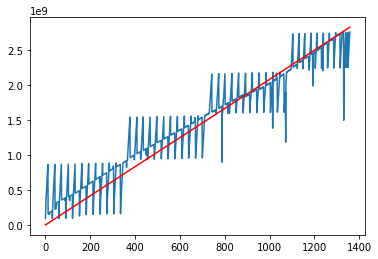

In [21]:
y6 = data6['Total']
model6  = sm.OLS(y6,x6).fit()
pred6 = model6.predict(x6)

plt.plot(x6,y6)
plt.plot(x6,pred6,color='red')
plt.show()

In [22]:
data2 = data2.iloc[0:44]

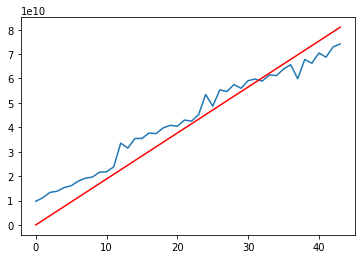

In [23]:
data2 = data2.reset_index()
data2['Index'] = data2.index
x2 = data2['Index']
y2 = data2['Total']
model2  = sm.OLS(y2,x2).fit()
pred2 = model2.predict(x2)

plt.plot(x2,y2)
plt.plot(x2,pred2,color='red')
plt.show()

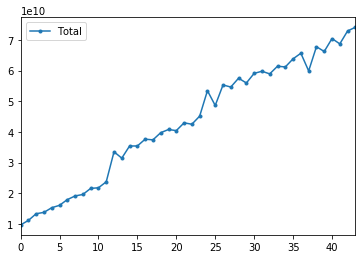

In [24]:
data2.plot(y='Total', style='.-')

# data3: get faulty 0 values in the data field

In [25]:
data3 = data.ix[(data['Total'] <= 25)]

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [26]:
data3

,index,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,...,R69,R70,R71,R72,Total,date,month,year,hour,Index
8788,8817,2016-01-19 09:58:11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,9,8.788
8789,8834,2016-01-19 10:01:11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.789
8790,8833,2016-01-19 10:04:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.790
8791,8832,2016-01-19 10:07:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.791
8792,8831,2016-01-19 10:10:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.792
8793,8830,2016-01-19 10:13:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.793
8794,8829,2016-01-19 10:16:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.794
8795,8828,2016-01-19 10:24:54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.795
8796,8827,2016-01-19 10:48:22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.796
8797,8826,2016-01-19 10:51:22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.797


In [27]:
data['date']= pd.to_datetime(data['date']) 

In [28]:
data.describe()

,index,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R68,R69,R70,R71,R72,Total,month,year,hour,Index
count,650327.000000,650327.000000,650327.000000,650327.000000,650327.000000,650327.000000,650327.000000,650327.000000,650327.000000,650327.000000,...,650327.000000,650327.000000,650327.000000,650327.000000,650327.0,6.503270e+05,650327.000000,650327.000000,650327.000000,650327.000000
mean,325485.368561,1819.376569,5035.990800,26.841241,52427.447739,1.514656,4185.819135,29.527655,50011.606051,0.333991,...,20.841320,7780.759764,10.110963,3846.957456,0.0,3.094732e+06,6.320971,2017.385032,11.507189,325.163000
std,187883.916490,110.462004,454.518012,24.403642,20670.355121,1.183443,740.195967,28.529873,27711.883681,0.226683,...,6.313809,2440.781653,9.275259,2038.980246,0.0,1.517346e+06,3.394523,1.078019,6.923540,187.733379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,1.000000,2016.000000,0.000000,0.000000
25%,162779.500000,1816.340000,4624.190000,8.840000,35824.815000,0.730000,3759.040000,7.350000,24349.600000,0.000000,...,17.220000,5814.270000,1.200000,1617.270000,0.0,1.821264e+06,3.000000,2016.000000,6.000000,162.581500
50%,325418.000000,1821.400000,4708.470000,14.930000,53334.840000,0.930000,3820.720000,14.570000,47520.780000,0.400000,...,20.750000,7411.820000,8.070000,3623.450000,0.0,3.128171e+06,6.000000,2017.000000,12.000000,325.163000
75%,488241.500000,1849.560000,5505.690000,42.970000,68459.630000,2.850000,4903.945000,48.420000,72561.260000,0.560000,...,24.250000,9644.820000,19.780000,6009.315000,0.0,4.303263e+06,9.000000,2018.000000,18.000000,487.744500
max,650843.000000,1851.020000,5610.850000,75.870000,87286.850000,4.690000,6404.640000,87.160000,98749.410000,0.560000,...,29.810000,11229.660000,31.160000,8119.170000,0.0,6.349307e+06,12.000000,2019.000000,23.000000,650.326000


# data5: data grouped into hours 

In [29]:
data5= data.groupby(['hour']).sum()

In [30]:
data5

,index,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R67,R68,R69,R70,R71,R72,Total,month,year,Index
hour,,,,,,,,,,,,,,,,,,,,,
0,8846853317,4.944396e+07,1.368889e+08,729797.70,1.424922e+09,41176.30,1.137402e+08,802891.33,1.359410e+09,9074.79,...,2.294983e+07,566350.07,2.114638e+08,274942.62,1.045856e+08,0.0,8.411831e+10,171812,54830545,8838088.853
1,8758513167,4.893188e+07,1.354844e+08,723754.41,1.410403e+09,40857.70,1.126279e+08,796264.17,1.345824e+09,8954.16,...,2.270722e+07,560407.83,2.092479e+08,272615.87,1.035947e+08,0.0,8.327097e+10,170319,54263655,8749821.414
2,8727011386,4.901622e+07,1.355998e+08,716759.24,1.408007e+09,40522.69,1.125904e+08,787950.53,1.340918e+09,9049.61,...,2.268532e+07,560227.74,2.091274e+08,270177.43,1.031762e+08,0.0,8.304415e+10,170792,54362215,8719289.661
3,8846729893,4.942581e+07,1.368440e+08,729830.56,1.424773e+09,41173.19,1.137051e+08,802913.13,1.359347e+09,9072.30,...,2.294732e+07,566244.26,2.114330e+08,274893.24,1.045675e+08,0.0,8.411358e+10,171748,54810379,8837825.398
4,8844060169,4.938248e+07,1.367319e+08,729700.72,1.424129e+09,41163.01,1.136182e+08,802767.35,1.358875e+09,9063.18,...,2.293505e+07,565938.51,2.113195e+08,274815.92,1.045186e+08,0.0,8.408234e+10,171664,54761984,8835367.063
5,8844028082,4.936266e+07,1.366811e+08,729779.30,1.423941e+09,41159.76,1.135789e+08,802879.30,1.358829e+09,9059.31,...,2.293117e+07,565823.39,2.112737e+08,274826.33,1.045053e+08,0.0,8.407608e+10,171620,54739810,8835574.596
6,8827872828,4.928746e+07,1.364628e+08,728482.82,1.421529e+09,41086.69,1.134016e+08,801409.95,1.356377e+09,9038.71,...,2.289142e+07,564912.27,2.109107e+08,274264.24,1.043166e+08,0.0,8.392739e+10,171308,54657076,8818237.716
7,8827147698,4.931075e+07,1.365202e+08,728466.82,1.421641e+09,41091.18,1.134492e+08,801396.92,1.356364e+09,9042.93,...,2.289501e+07,564937.99,2.109249e+08,274255.81,1.043320e+08,0.0,8.392791e+10,171323,54683276,8817564.438
8,8803351013,4.924916e+07,1.363301e+08,725634.85,1.418446e+09,40955.29,1.132606e+08,798171.75,1.352767e+09,9046.52,...,2.284905e+07,563848.23,2.105196e+08,273280.16,1.040654e+08,0.0,8.371913e+10,171091,54616628,8794305.056


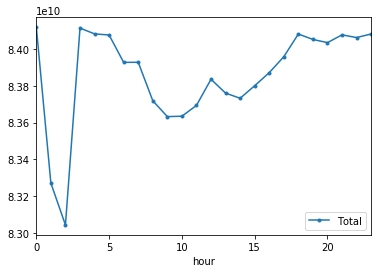

In [31]:
data5.plot(y='Total', style='.-')